# Computer Vision Project

### Setup

In [31]:
import os                           # type: ignore
import numpy as np                  # type: ignore
import matplotlib.pyplot as plt     # type: ignore
import pandas as pd                 # type: ignore
import albumentations as albu       # type: ignore
import importlib
import segmentation
import segmentation.dataset
importlib.reload(segmentation.dataset)

from segmentation.dataset import CVDataset
importlib.reload(segmentation.dataset)
from segmentation.utils import preprocessing, show, model_utils
importlib.reload(segmentation.utils)

<module 'segmentation.utils' from '/Users/georgeboutselis/Library/CloudStorage/OneDrive-UniversityofEdinburgh/Year 4/Semester 2/Computer Vision/Computer-Vision-Project/segmentation/utils.py'>

In [32]:
# Defining some constants that will be used throughout the notebook
CLASSES = ['dog', 'cat', 'background']
DATA_DIR = 'Dataset/'
x_test_dir = os.path.join(DATA_DIR, 'Test/color')
y_test_dir = os.path.join(DATA_DIR, 'Test/label')
x_trainVal_dir = os.path.join(DATA_DIR, 'TrainVal/color')
y_trainVal_dir = os.path.join(DATA_DIR, 'TrainVal/label')

### Splitting the TrainVal data into training and validation data
* Splitting into training and validations sets is needed so we can evaluate peformance on the model while training.
* More common than K-fold cross validation in deep learning settings because of computational costs.

In [33]:
# Getting a list of relative paths to the images (x) and the masks/labels (y)
x_test_fps, y_test_fps = preprocessing.get_testing_paths(x_test_dir, y_test_dir)

# Splitting relative path names into into training and validation
x_train_fps, x_val_fps, y_train_fps, y_val_fps = preprocessing.train_val_split(x_trainVal_dir, y_trainVal_dir, 0.2)


### Custom Dataset

In [34]:
train_dataset = CVDataset(x_train_fps, y_train_fps)
valid_dataset = CVDataset(x_val_fps, y_val_fps)
test_dataset  = CVDataset(x_test_fps, y_test_fps)


# Printing the size of each dataset
print(f'Training dataset has size {train_dataset.__len__()}')
print(f'Validation dataset has size {valid_dataset.__len__()}')
print(f'Testing dataset has size {test_dataset.__len__()}')

Training dataset has size 2938
Validation dataset has size 735
Testing dataset has size 3694


In [35]:
import torchvision.transforms.functional as TF

from segmentation.utils import preprocessing
importlib.reload(segmentation.utils)

<module 'segmentation.utils' from '/Users/georgeboutselis/Library/CloudStorage/OneDrive-UniversityofEdinburgh/Year 4/Semester 2/Computer Vision/Computer-Vision-Project/segmentation/utils.py'>

In [36]:
valid_augmentation = preprocessing.get_validation_augmentation()
preprocess_fn = preprocessing.get_preprocessing(preprocessing_fn=None) 
test_dataset = CVDataset(x_test_fps[1:100], y_test_fps[1:100], augmentation=valid_augmentation, preprocessing = preprocess_fn, apply_augmentations_to_mask=False)

In [37]:
from segmentation.utils import ModelEval
importlib.reload(segmentation.utils)
from models import unet_model
model = unet_model.UNET(3, 3)
import torch
state_dict = torch.load('/Users/georgeboutselis/Downloads/my_checkpoint.pth (2).tar', map_location= torch.device('cpu'))
model_utils.load_checkpoint(state_dict, model)
eval = ModelEval(test_dataset, model, device='cpu')

=> Loading checkpoint


/var/folders/9j/990ygjw152b6spbgwjj_qtj40000gn/T/ipykernel_69765/686147418.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('/Users/georgeboutseli

In [39]:
eval.IntersectionOverUnion(progress_bar=True)

100%|██████████| 99/99 [00:33<00:00,  2.96it/s]

Mean IoU: 0.5336


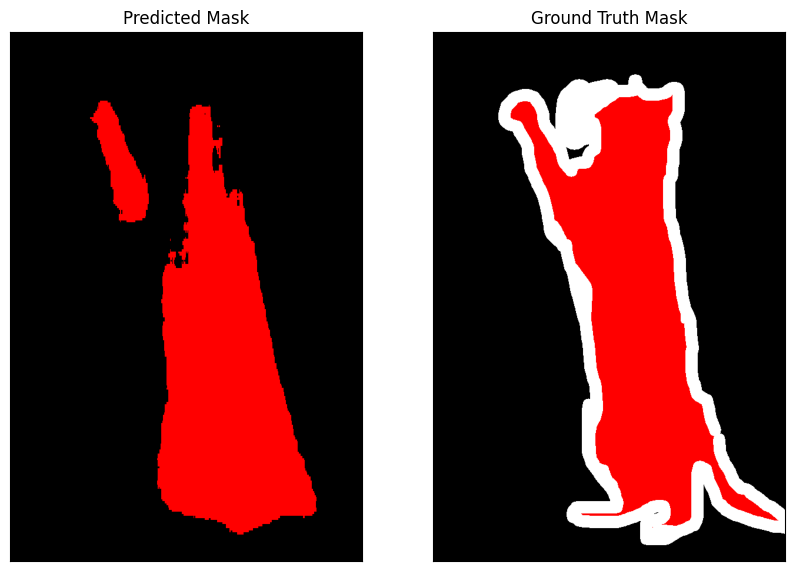

In [40]:
eval.visualise()